# PMOIRED example #3: AX Cir and companion search

binary search *à la* [CANDID](https://github.com/amerand/CANDID). Results are currently slightly different as accounting for bandwidth smearing in PMOIRED is still not working properly...

*https://github.com/amerand/PMOIRED - Antoine Mérand (amerand@eso.org)*

In [1]:
%pylab notebook
try:
    # -- global installation
    import pmoired
    print('global')
except:
    # -- local installation
    import sys
    sys.path = ['../pmoired'] + sys.path
    import __init__ as pmoired
    print('local')
import os

from importlib import reload

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

Populating the interactive namespace from numpy and matplotlib
[P]arametric [M]odeling of [O]ptical [I]nte[r]ferom[e]tric [D]ata https://github.com/amerand/PMOIRED
local


# Load Data

In [2]:
# reload(pmoired.oicandid)
# reload(pmoired.oimodels)
# reload(pmoired.oifits)
# reload(pmoired)
# pmoired.oimodels.SMEA=0

data = pmoired.OI('AXCir.oifits')

loadOI: loading AXCir.oifits
  > insname: "PIONIER_Pnat(1.6135391/1.7698610)" targname: "AX_CIR" pipeline: ""
  > MJD: [56487.97305633923, 56487.97393179347, 56487.97480311718, 56487.97567612686, 56487.97654849956, 56487.98993815819, 56487.990812632524, 56487.99168235045, 56487.992556167876, 56487.993429625145, 56488.00573612476, 56488.006608098876, 56488.00747989074, 56488.008355897415, 56488.009225301685, 56488.01009631798, 56488.01097278044, 56488.01184104877, 56488.01271335528, 56488.01359114645, 56488.03308009381, 56488.033590092076, 56488.034099806384, 56488.034609943774, 56488.035122056725, 56488.03563601018, 56488.03614173218, 56488.03664971952, 56488.0371620554, 56488.037670965175, 56488.04667515908, 56488.047189387165, 56488.04770007059, 56488.04821183202, 56488.04872313115, 56488.04923333806, 56488.04974387007, 56488.05025742777, 56488.05077371096, 56488.05128556907, 56488.0586200955, 56488.059128990484, 56488.059639380604, 56488.060149933954, 56488.060659175615, 56488.06116

# Grid search

As in [CANDID](https://github.com/amerand/CANDID), we do a set of fits, with the initial guesses using a grid for the companion's position. One must always defined which observable will be fitted: here `V2` and `T3PHI` (the closure phase). The grid size and pitch is set automatically but also can be adjusted by hand using `rmin`, `rmax` and `rstep` (all in mas). By default, only the position and flux of the companion (w.r.t. the flux of the central star) will be adjusted. Here we use the `fitAlso` option to also fit the uniform disk diameter of the central star. 

max(B/wl), max(B/wl/R): 51.027177366967955 2.357631949946508
> rstep set to 4.04 mas based on largest (B/wl)
> rmin set to 4.04 mas based on rstep
> rmax set to 43.7 mas based on largest (B/wl/R)
uniform disk fit: chi2=0.975
firstGuess: {'*,ud': 0.0, '*,f': 1.0, 'c,ud': 0.0, 'c,f': 0.01}


<IPython.core.display.Javascript object>


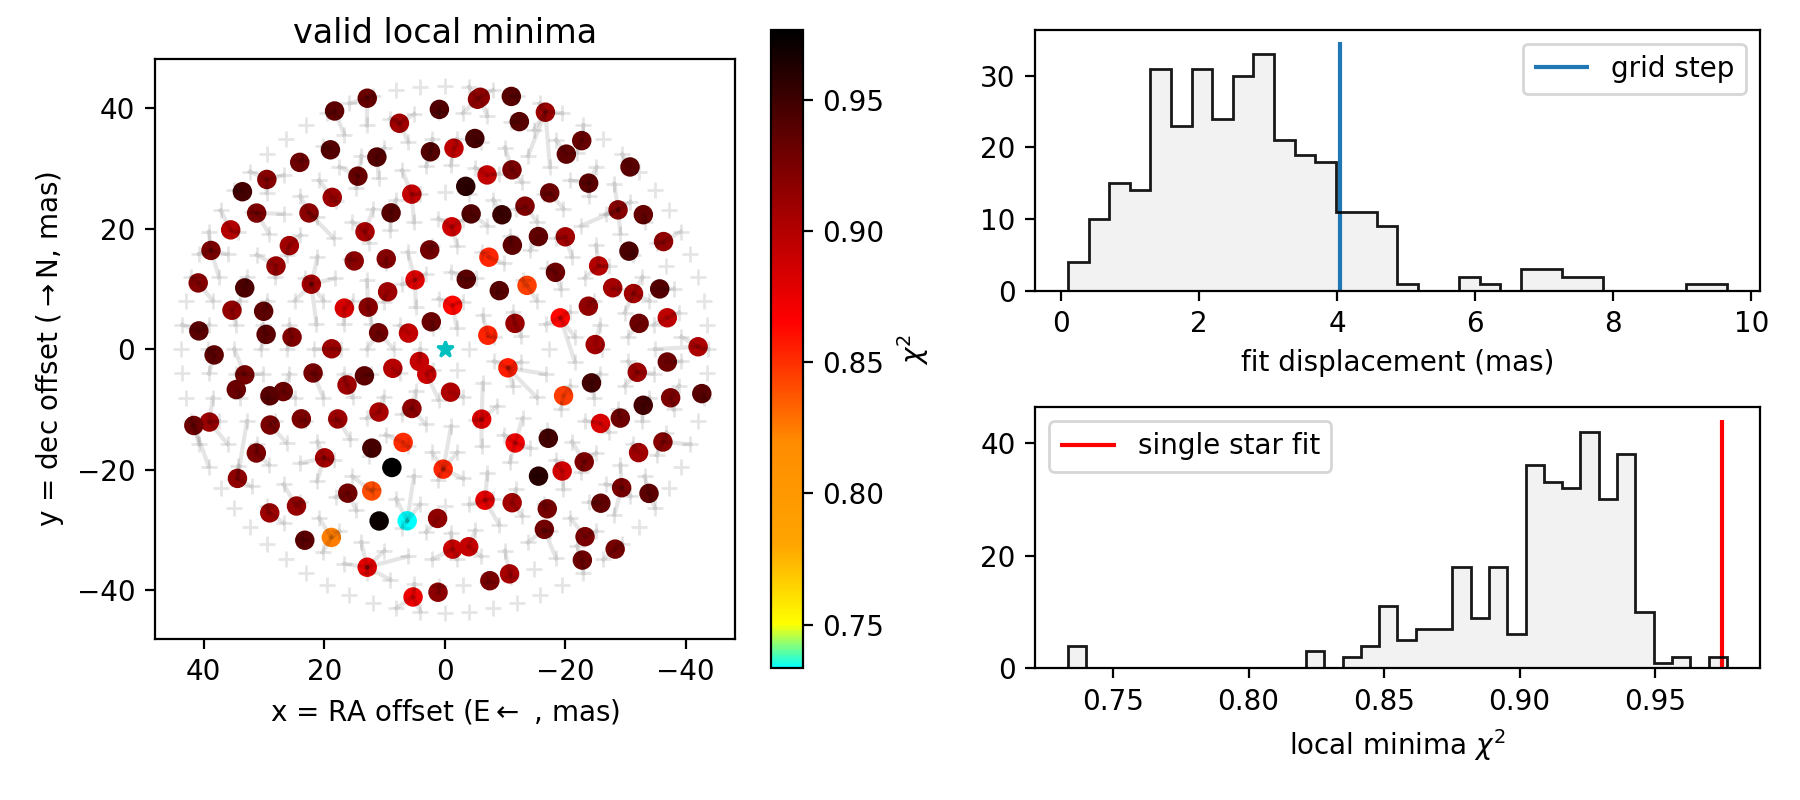

running 367 fits...
initial estimate: 1255.5 fit per minute using 8 threads
it took 70.6s, 312 fit per minute on average (192ms per fit)
    72709 calls, 198.1 calls per fit, 0.97ms per call
  - removing 7 fits which did not converge properly
  - removing 40 fits outside search range
154 unique minima from 320 fits
best fit chi2 = 0.733
{
   '*,f': 1.0 ,
   'c,ud': 0.0 ,
   'c,f': 0.00853, # +- 0.00039
   'c,x': 6.226, # +- 0.059
   'c,y': -28.503, # +- 0.078
   '*,ud': 0.8278, # +- 0.0078
}
separation: 29.1754 mas
PA: 167.68 degress


In [3]:
data.setupFit({'obs':['V2', 'T3PHI']})
data.candidFitMap(fitAlso=['*,ud'])

Once the best solution is found, one can look at the model compared to the data. In this case, one cannot dicern that a binary is present, by just looking at the data. This is why an approach of grid search is necessary to find the companion. 

showing best fit model


<IPython.core.display.Javascript object>


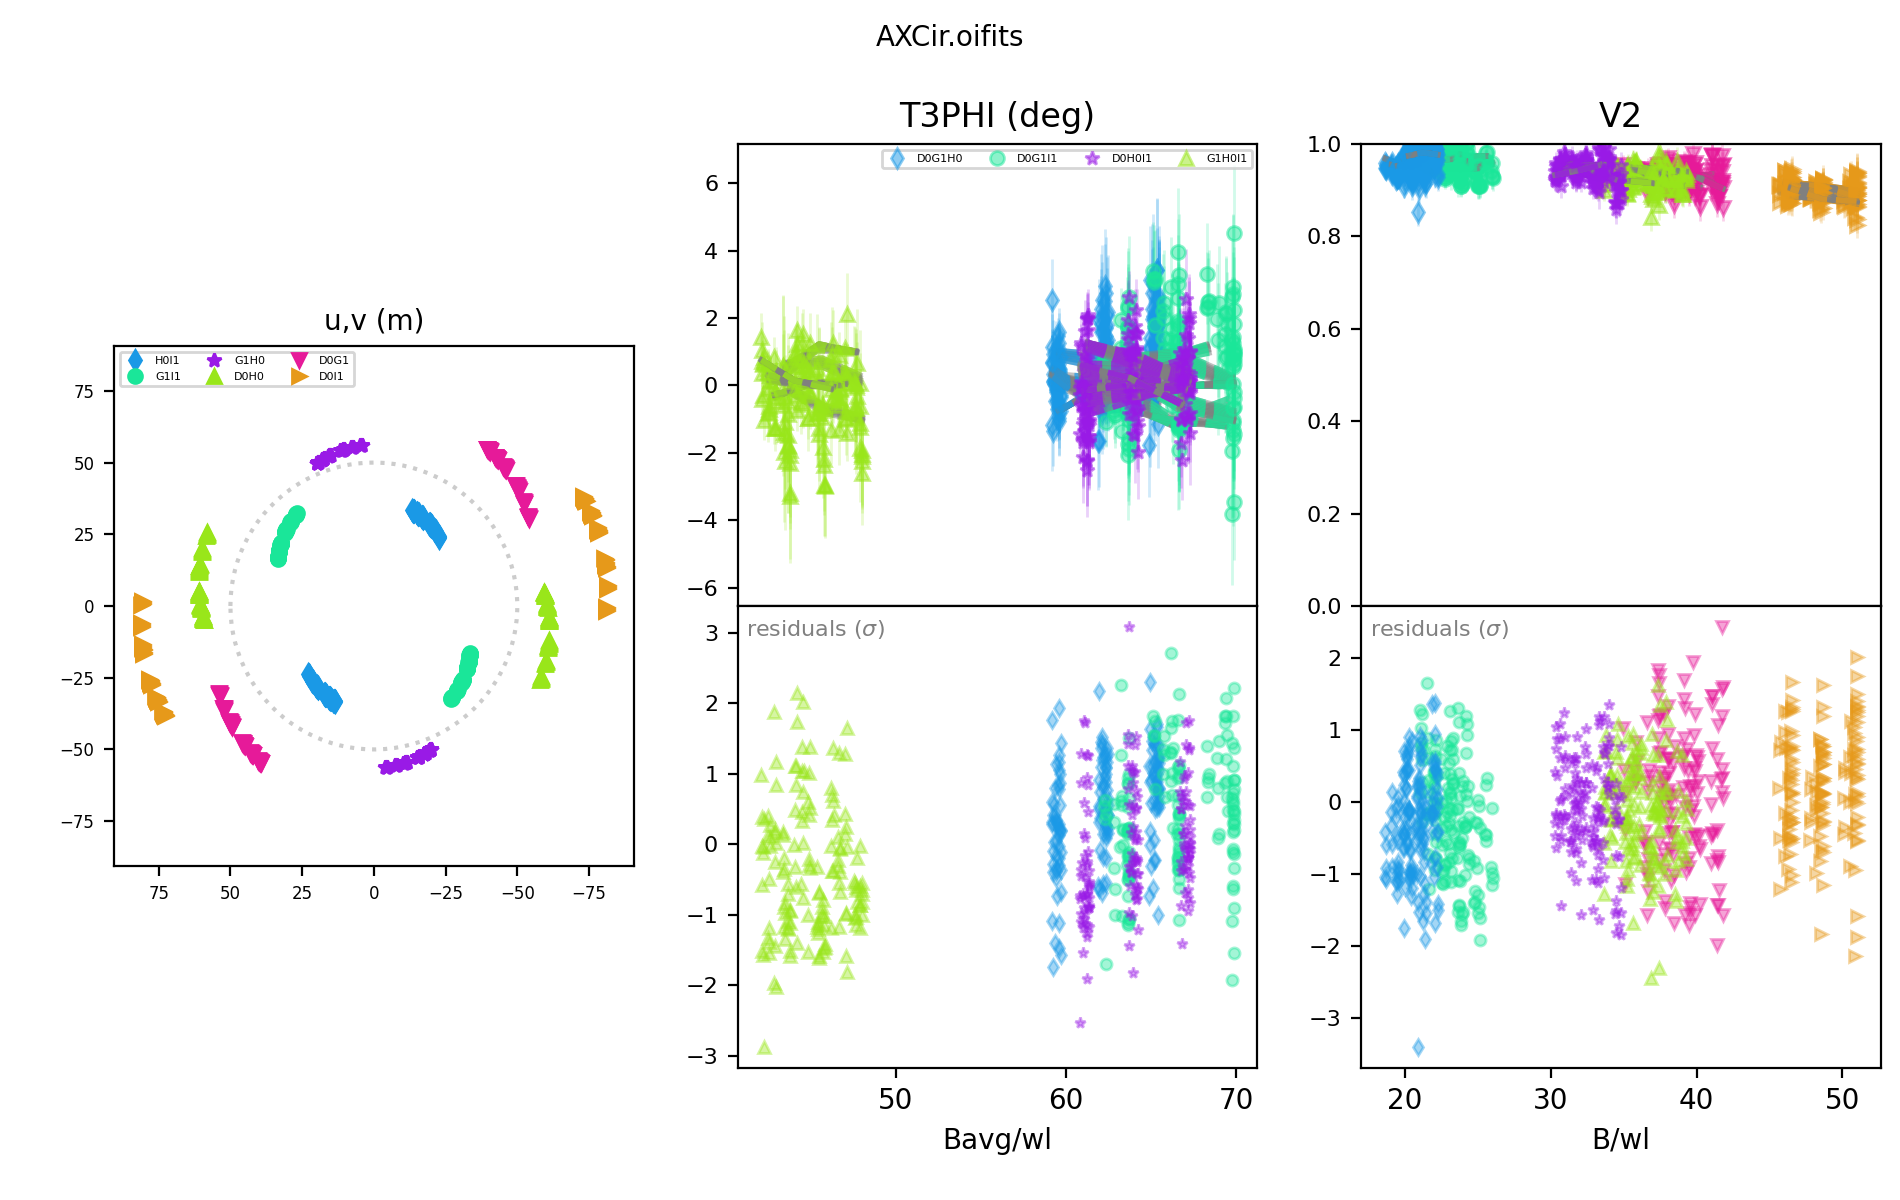

done in 2.55s


In [4]:
data.show()

One can refine the estimation of the companion parameters, by using bootstrapping. This usually results in larger uncertainties, because bootstrapping mitigate the effects of correlated data. In the case of this example, because we have only one sequence of observations, data resampling does not help much. However, it shows that the data set is consistent: there are no part of the dataset improving / degrading the companion detection.

running 300 fits...
one fit takes ~0.38s using 8 threads
it took 19.7s, 0.07s per fit on average
using 300 fits out of 300 (sigma clipping 4.50)
{'*,f' :1.0
'*,ud': 0.8282, # +/- 0.0076
'c,f' : 0.00851, # +/- 0.00038
'c,ud':0.0
'c,x' : 6.230, # +/- 0.063
'c,y' : -28.501, # +/- 0.077
}
Correlations (%)  >=90 >=80 >=70 >=50 >=20 <20%
           0   1   2   3 
  0: c,f ###  13  -4 -59  -9 
  1: c,x  13 ### -12 -17 -20 
  2: c,y  -4 -12 ###  -5  12 
  3:*,ud -59 -17  -5 ###  10 


<IPython.core.display.Javascript object>


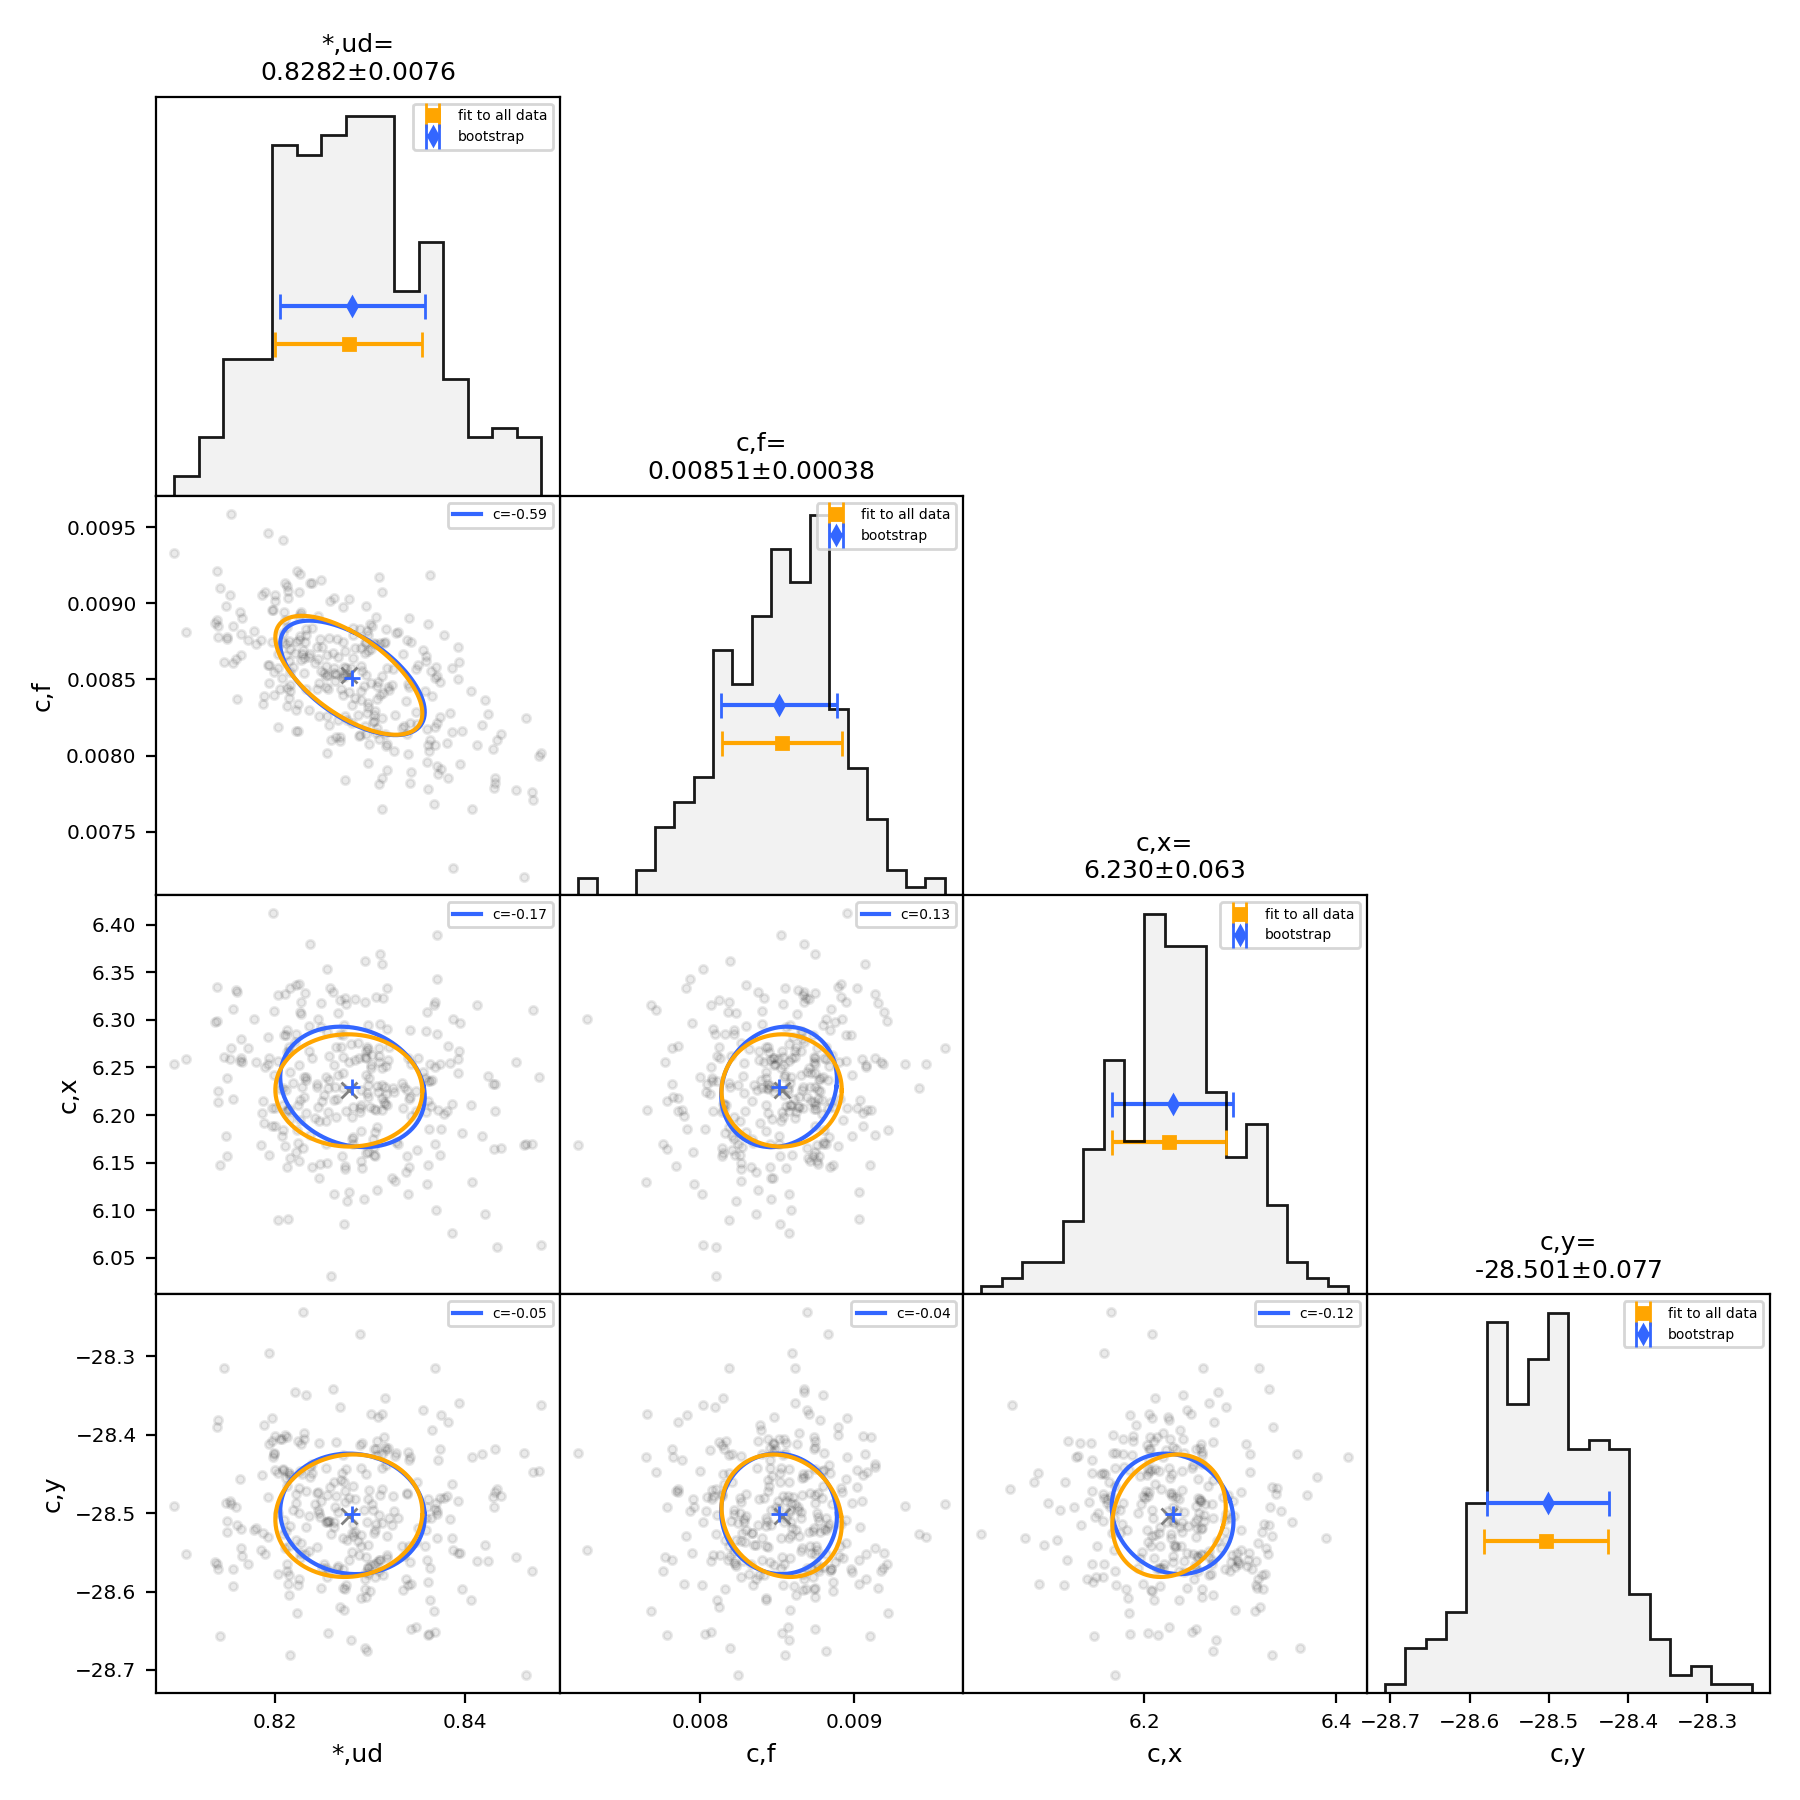

ellipse (emin, emax, PA) for c,x/c,y: 0.0619 0.0779 -16.1


In [5]:
data.bootstrapFit(300)
data.showBootstrap()

# Under development

[P]arametric [M]odeling of [O]ptical [I]nte[r]ferom[e]tric [D]ata https://github.com/amerand/PMOIRED
loadOI: loading AXCir.oifits
  > insname: "PIONIER_Pnat(1.6135391/1.7698610)" targname: "AX_CIR" pipeline: ""
  > MJD: [56487.97305633923, 56487.97393179347, 56487.97480311718, 56487.97567612686, 56487.97654849956, 56487.98993815819, 56487.990812632524, 56487.99168235045, 56487.992556167876, 56487.993429625145, 56488.00573612476, 56488.006608098876, 56488.00747989074, 56488.008355897415, 56488.009225301685, 56488.01009631798, 56488.01097278044, 56488.01184104877, 56488.01271335528, 56488.01359114645, 56488.03308009381, 56488.033590092076, 56488.034099806384, 56488.034609943774, 56488.035122056725, 56488.03563601018, 56488.03614173218, 56488.03664971952, 56488.0371620554, 56488.037670965175, 56488.04667515908, 56488.047189387165, 56488.04770007059, 56488.04821183202, 56488.04872313115, 56488.04923333806, 56488.04974387007, 56488.05025742777, 56488.05077371096, 56488.05128556907, 56488.05

<IPython.core.display.Javascript object>


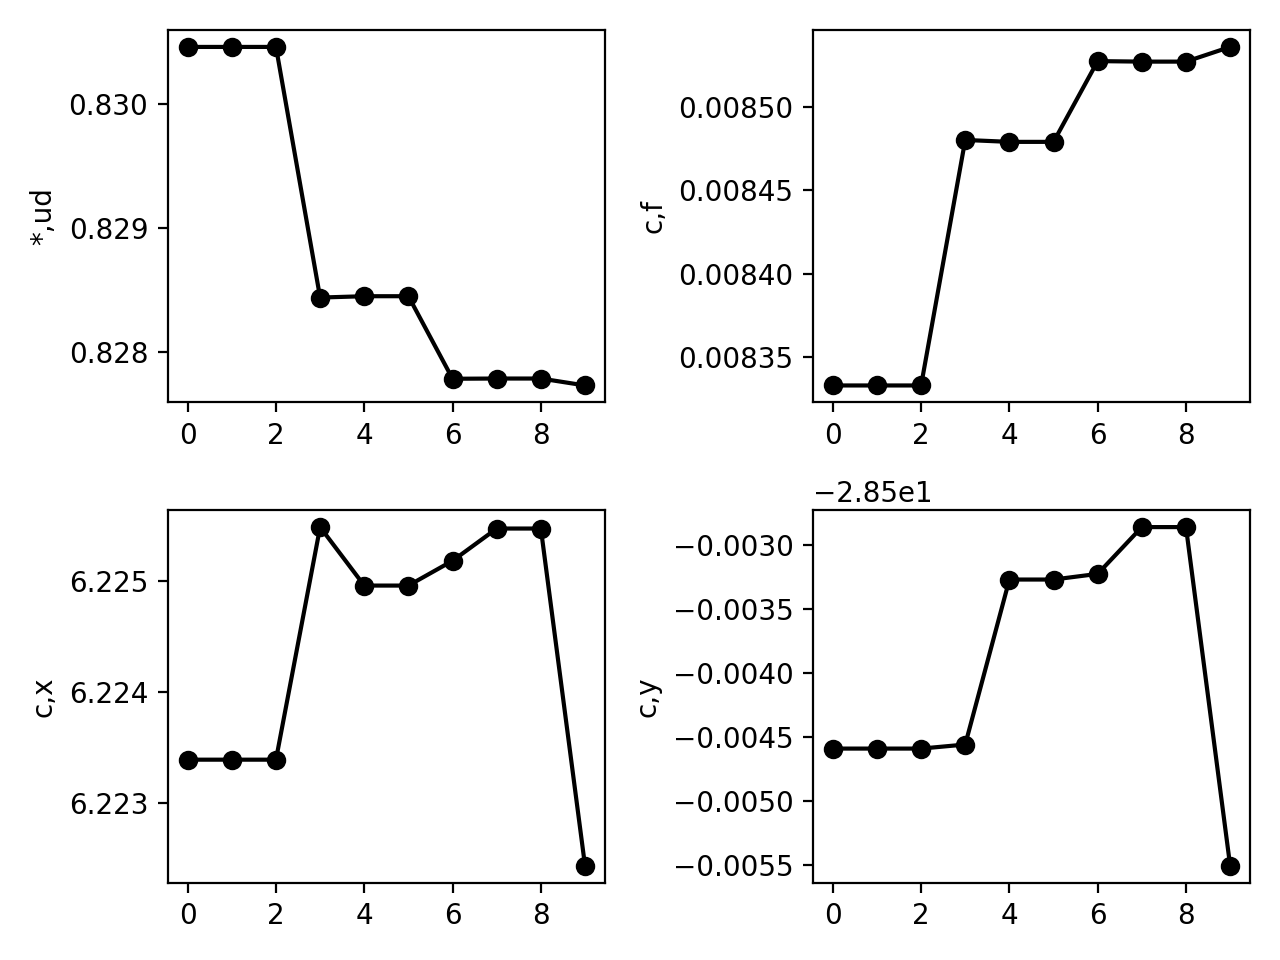

<IPython.core.display.Javascript object>


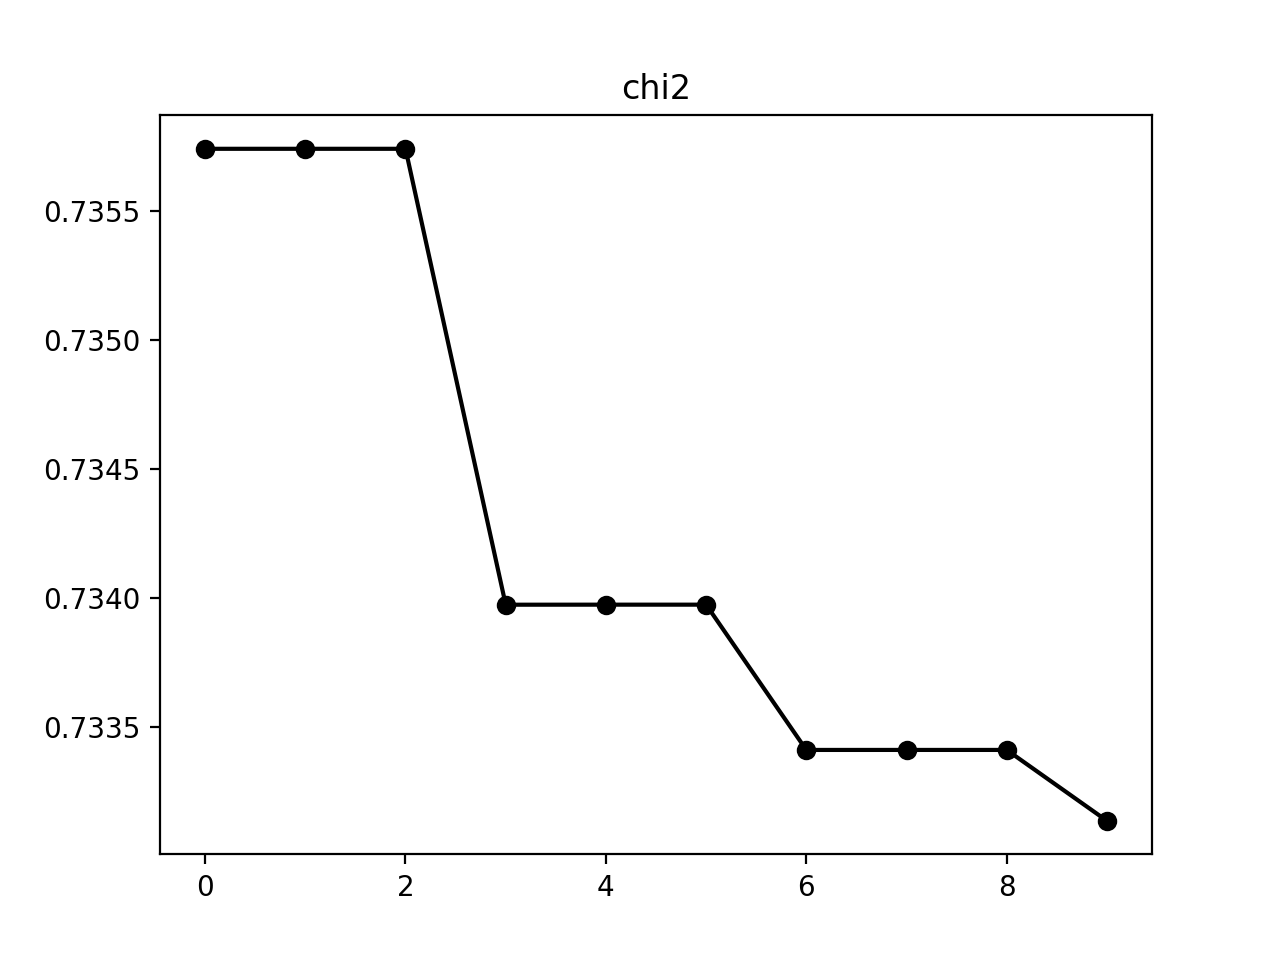

Text(0.5, 1.0, 'chi2')

In [6]:
reload(pmoired.oicandid)
reload(pmoired.oimodels)
reload(pmoired.oifits)
reload(pmoired)

data = pmoired.OI('AXCir.oifits')
data.setupFit({'obs':['V2', 'T3PHI']})

# -- check effects of bandwidth smearing
SMEA = np.arange(10)
#SMEA = [5]
res = []
for s in SMEA:
    pmoired.oimodels.SMEA=s
    p = {'*,ud':0.83, '*,f':1.0, 'c,ud':0.0, 'c,x':6., 'c,y':-28.3, 'c,f':0.009}
    data.doFit(p, doNotFit=['*,f', 'c,ud'], verbose=0)
    res.append(data.bestfit)
plt.close(10)
plt.figure(10)
#plt.plot(SMEA, [r['chi2'] for r in res])
for i,k in enumerate(['*,ud', 'c,f', 'c,x', 'c,y']):
    plt.subplot(2,2,i+1)
    plt.plot(SMEA, [r['best'][k] for r in res], '-ok')
    plt.ylabel(k)
plt.tight_layout()

plt.close(11)
plt.figure(11)
plt.plot(SMEA, [r['chi2'] for r in res], '-ok')
plt.title('chi2')

#print(np.sqrt(data.bestfit['best']['c,x']**2+data.bestfit['best']['c,y']**2))

<IPython.core.display.Javascript object>


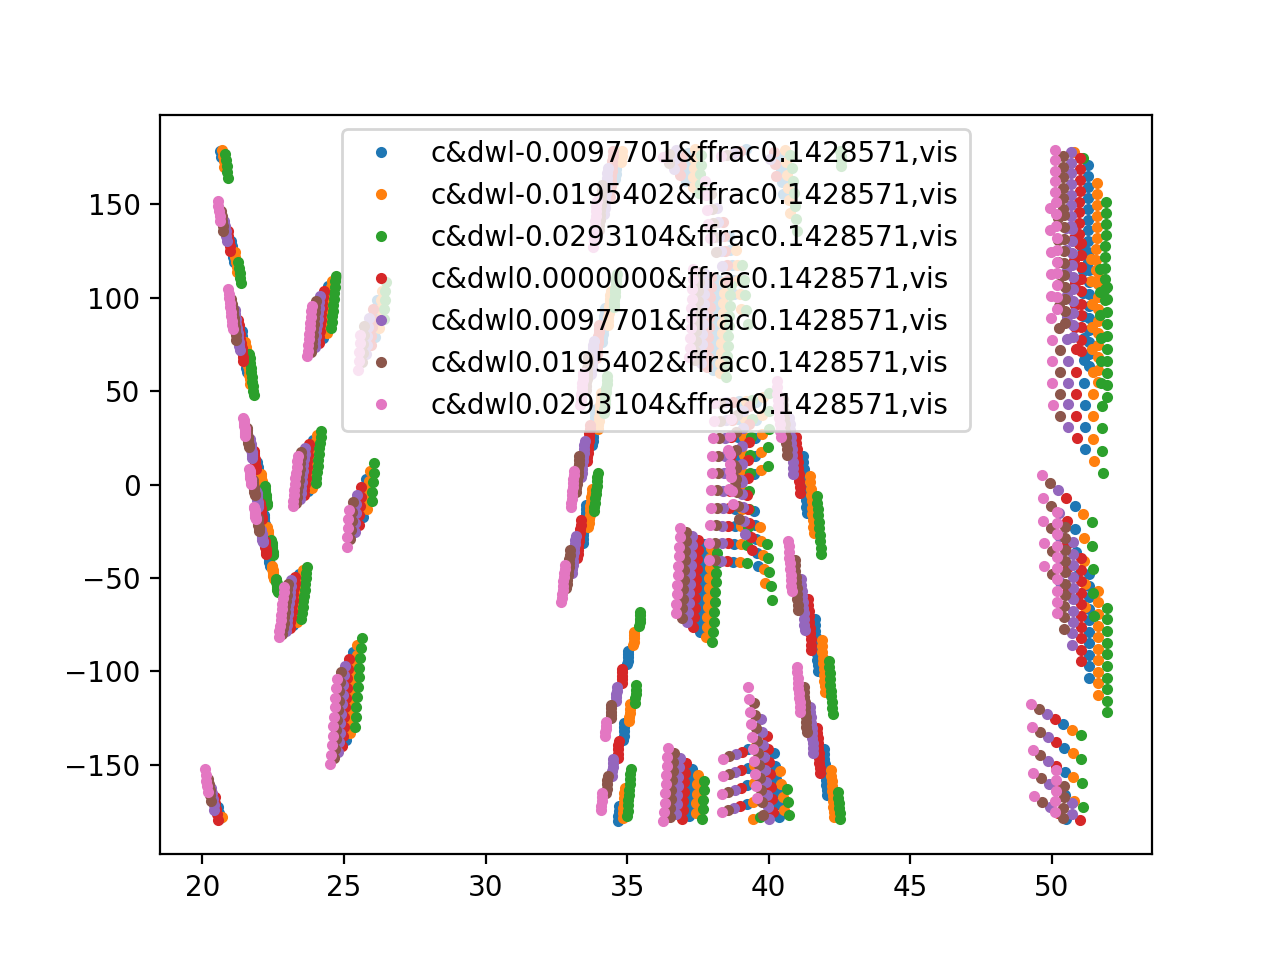

In [7]:
K = sorted(list(filter(lambda x: x.startswith('c') and x.endswith(',vis'), data._model[0]['MODEL'].keys())))

plt.close(12); plt.figure(12)
for k in K:
    plt.plot(data._model[0]['MODEL'][k]['all']['B/wl'][:,0], data._model[0]['MODEL'][k]['all']['PHI'][:,0], '.',
            label=k)
plt.legend()